## Implement simple gradient based learner for L2 regularized logistric regression, where 2d input is used.

In [257]:
import numpy as np
import matplotlib.pyplot as plt

In [256]:
class LogisticRegression:
    def __init__(self, w=np.array([0.0, 0.0]), lr=0.1, rho=0.99, lam=0.01):
        self.weight = w
        self.lr = lr
        self.rho = rho
        self.lam = lam
    
    def predict(self, x, y):
        return -np.log(self.sigmoid(x, y)) + self.lam * np.linalg.norm(x)

    def grad(self, x, y):
        return (self.sigmoid(x, y) - 1.0) * y * x
            
    def sigmoid(self, x, y):
        return 1 / (1 + np.exp(-y * np.dot(x, self.weight)))

    def train(self, x, y, epochs=5):
        _loss_history = np.zeros(epochs)
        _weight_history = np.zeros(epochs)
        for epoch in range(epochs):
            _grad = np.zeros(2)
            _loss = 0.0
            for i in range(len(x)):
                _grad += self.grad(x[i], y[i])
                _loss += self.predict(x[i], y[i])
            _grad = _grad / len(x) + 2 * self.lam * self.weight
            _loss_history[epoch] = _loss / len(x)
            _weight_history[epoch] = self.weight[0]
            self.weight -= self.lr * _grad
            self.lr *= self.rho
            # print("epoch = {}\tloss = {}\tw1 = {}".format(epoch, _loss_history[epoch], _weight_history[epoch]))
            
        return _loss_history, _weight_history

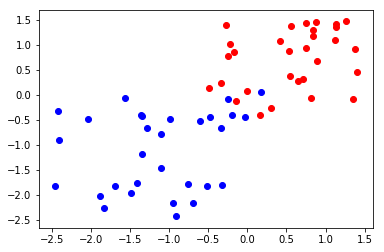

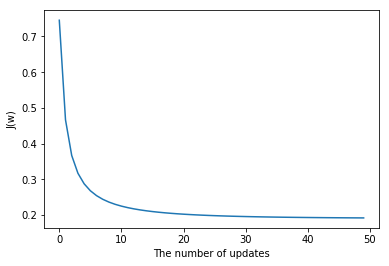

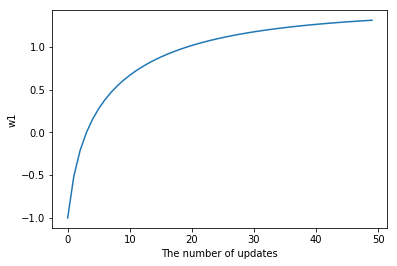

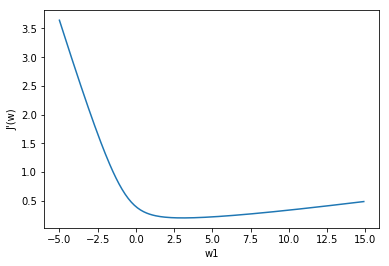

In [255]:
epochs = 50  # 更新回数
n = 30   # 各データ数
dim = 2  # 次元
pos = (2.5 - 0.5) * np.random.rand(n, dim) - 0.5   # -0.5~2.5の２次元データ
neg = (0.5 + 2.5) * np.random.rand(n, dim) - 2.5   # -2.5~0.5の２次元データ

# ２次元データのプロット
plt.scatter(pos[:,0], pos[:,1], c='red')
plt.scatter(neg[:,0], neg[:,1], c='blue')
plt.show()

# 入力データとラベルの生成
x = np.r_[pos, neg]
y = np.r_[np.ones(n), np.full(n, -1)]

# ロジスティック回帰
lr = LogisticRegression(w=np.array([-1.0, 1.0]), lr=1.0)
loss, weight = lr.train(x, y, epochs)
x_axis = np.arange(epochs)

# 誤差のプロット
plt.plot(x_axis, loss)
plt.xlabel("The number of updates")
plt.ylabel("J(w)")
plt.show()

# 重みの変化のプロット
plt.plot(x_axis, weight)
plt.xlabel("The number of updates")
plt.ylabel("w1")
plt.show()

# w1を変化させた時のJ'(w)のプロット
x_axis = np.arange(-5.0, 15.0, 0.1)
value = np.zeros(len(x_axis))
for i in range(len(x_axis)):
    lr = LogisticRegression(np.array([x_axis[i], 1.0]))
    for k in range(len(x)):
        value[i] += lr.predict(x[k], y[k])
    value[i] /= len(x)
plt.plot(x_axis, value)
plt.xlabel("w1")
plt.ylabel("J'(w)")
plt.show()